In [23]:
import os
import numpy as np
from ctypes import CDLL, POINTER, c_float, c_bool, c_int16, c_int32
from scipy.io import wavfile
from IPython.display import display, Audio
from matplotlib import pyplot

In [2]:
current_dir = os.path.dirname(os.path.realpath(os.path.abspath('')))

In [3]:
shared_file = os.path.normpath(current_dir + '/build/libreaper_c_api.dylib')
reaper = CDLL(shared_file)

reaper.init.argtypes = [
    c_float,
    c_bool,
    c_bool,
]
reaper.process.argtypes = [
    POINTER(c_int16),
    c_int32,
]
reaper.get_output_error.restype = c_bool
reaper.get_output_length.restype = c_int32
reaper.get_output.argtypes = [
    POINTER(c_float),
    POINTER(c_float),
]

In [4]:
audio_path = os.path.normpath(current_dir + '/audio/evil_test_laugh.wav')
sample_rate, audio = wavfile.read(audio_path)
display(Audio(data=audio, rate=sample_rate))

In [5]:
do_highpass = True
do_hilbert = True # TODO: what is this?

reaper.init(
    sample_rate,
    do_highpass,
    do_hilbert,
)

287332960

In [9]:
reaper.process(
    (c_int16 * len(audio))(*audio),
    len(audio),
)

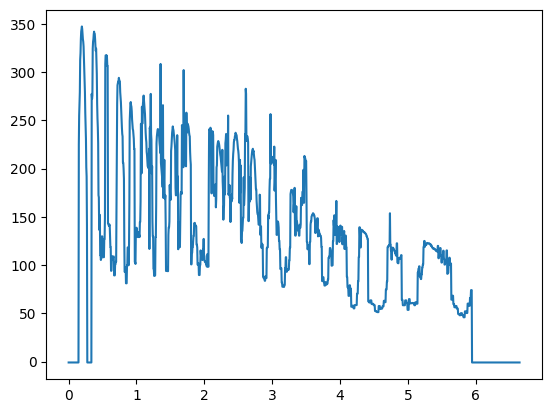

In [27]:
if reaper.get_output_error():
    print('Error occurred.')
    
output_length = reaper.get_output_length()
output_times = (c_float * output_length)()
output_freqs = (c_float * output_length)()
reaper.get_output(output_times, output_freqs)
output_times = np.frombuffer(output_times, c_float)
output_freqs = np.frombuffer(output_freqs, c_float)
pyplot.plot(output_times, output_freqs)
pyplot.show()